In [2]:
import sys

sys.path.append('../common')

from data_reading import *
from knn import *

import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
np.set_printoptions(threshold=sys.maxsize)

In [3]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.rcParams['image.interpolation'] = 'bicubic'
plt.rcParams['image.cmap'] = 'gray'

In [4]:
data_obj = public_datasets(False)
x_train, y_train, x_test, y_test = data_obj.load_cifar_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## Visualize a few examples from the dataset

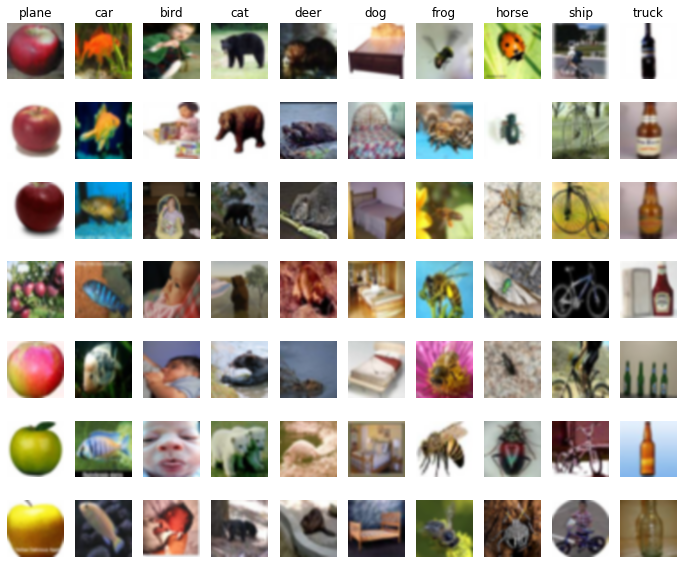

In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train==y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
            
plt.show()

In [6]:
num_training = 5000
mask = list(range(num_training))
X_train = x_train[mask]
Y_train = y_train[mask]
print(X_train.shape, Y_train.shape)

num_testing = 500
mask = list(range(num_testing))
X_test = x_test[mask]
Y_test = y_test[mask]
print(X_test.shape, Y_test.shape)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 32, 32, 3) (5000, 1)
(500, 32, 32, 3) (500, 1)
(5000, 3072) (500, 3072)


In [7]:
classifier = KNearestNeighbor()
classifier.train(X_train, Y_train)

In [8]:
def display(dists):
    plt.imshow(dists, interpolation='none')
    plt.show()

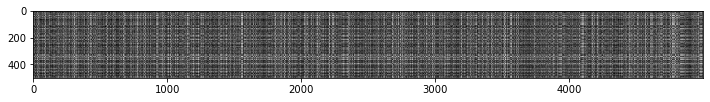

(500, 5000)

In [9]:
dists_2 = classifier.compute_distances_two_loops(X_test)
display(dists_2)
dists_2.shape

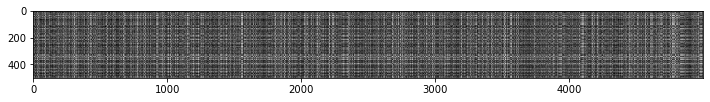

(500, 5000)

In [10]:
dists_1 = classifier.compute_distances_one_loop(X_test)
display(dists_1)
dists_1.shape

In [11]:
difference = np.linalg.norm(dists_2 - dists_1, ord='fro')
print('Difference between tow and one loops was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference between tow and one loops was: 0.000000
Good! The distance matrices are the same


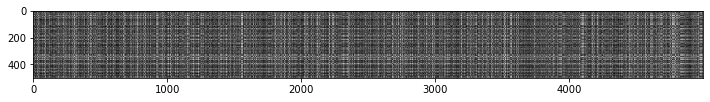

(500, 5000)

In [12]:
dists = classifier.compute_distances_no_loop(X_test)
display(dists)
dists.shape

In [13]:
difference = np.linalg.norm(dists_2 - dists, ord='fro')
print('Difference between two and no loops was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference between two and no loops was: 0.013754
Uh-oh! The distance matrices are different


In [14]:
np.argmax(dists, axis=1)

array([4939, 3270, 3270, 1990, 3270, 1563, 1990, 3270, 2297, 1990, 1990,
       4939, 4842, 3342, 4939, 3270, 2212, 4886, 3393, 3371, 2757, 4939,
       4842, 3270, 3270, 2039, 3393, 4939,  150, 2297, 3648, 1087, 4939,
       4308, 4375, 1990, 3648, 2039, 4939, 4106, 2039, 4939, 4939,  591,
       4842, 1959, 1990, 3270, 3270, 4570, 3270, 2297, 1990, 1990,  150,
        150, 3270, 3270, 1990, 1990, 4886, 1990, 4939, 1990, 3270, 3129,
       3270, 4939, 1990, 1990, 1581, 3648,  150, 4308, 1990, 4106, 1990,
       3290, 1990, 2297, 2039, 2297, 2297, 2050, 1990, 3270, 4939, 3270,
       2297, 3270, 1959, 4939, 3270, 1990, 3270, 4375, 3648, 4939, 4106,
       4106, 3270, 1990, 4106, 4939, 3270, 4939,  150, 4570, 4939, 4570,
       4939, 4939, 1990,  323, 4939, 4939, 4939, 2039, 1959, 4939, 4106,
       3342, 1990, 1990, 3270, 4375, 3270, 1990, 1087, 1990, 3648, 4939,
       3270, 3270, 3270, 3648, 2297, 1990,  779, 4570, 3270, 4570,  779,
       3270, 4939, 3270, 3290, 1990, 3270, 3648, 36

In [15]:
y_train[np.argsort(dists[0], axis=0)][0:1]

array([[39]])

In [43]:
y_test_pred = classifier.predict_labels(dists_2)
num_correct = np.sum(y_test_pred[:,None] == Y_test[None:,])
accuracy = float(num_correct)/num_test
print('Got %d / %d correct => accuracy: %f'%(num_correct, num_test, accuracy))

(500,)
Got 49 / 500 correct => accuracy: 0.098000


In [45]:
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([2, 3, 4, 5])
print(arr1.shape, arr2.shape)
res = (arr1 == arr2)
print(res)
print(np.equal(arr1, arr2))

(4,) (4,)
[False False False False]
[False False False False]


In [41]:
y_test_pred = classifier.predict_labels(dists, k=5)

num_correct = np.sum(y_test_pred[:,None] == Y_test[None:,])
accuracy = float(num_correct)/num_test
print('Got %d / %d correct => accuracy: %f'%(num_correct, num_test, accuracy))

(500,)
Got 43 / 500 correct => accuracy: 0.086000


In [25]:
num_folds = 2
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

x_train_folds = []
y_train_folds = []

x_train_folds = np.array_split(x_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
print(x_train.shape, y_train.shape)
for i in range(len(x_train_folds)):
    print(x_train_folds[i].shape, y_train_folds[i].shape)
    
k_to_accuracies = {}

(50000, 32, 32, 3) (50000, 1)
(25000, 32, 32, 3) (25000, 1)
(25000, 32, 32, 3) (25000, 1)


In [26]:
cv_fold = list(range(num_folds))
verbose = False

for k in k_choices:
    if verbose:
        print('Cross validation for %i neighbors'%k)
    else:
        sys.stdout.write('.')
        
    k_to_accuracies[k] = []
    for i in cv_fold:
        x_cv_training = np.vstack([x_train_folds[x] for x in cv_fold if x!= i])
        y_cv_training = np.hstack([y_train_folds[x] for x in cv_fold if x != i])
        
        x_cv_test = x_train_folds[i]
        y_cv_test = y_train_folds[i]
        print(x_cv_test.shape, x_cv_training.shape)
        clf = KNearestNeighbor()
        clf.train(x_cv_training, y_cv_training)
        
        y_pred = clf.predict(x_cv_test, k=k)
        
        k_to_accuracies[k].append(float(np.sum(y_pred==y_cv_test))/f_pred.shape[0])
        
        
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

.(25000, 32, 32, 3) (25000, 32, 32, 3)


MemoryError: Unable to allocate array with shape (25000, 25000, 32, 3) and data type float32